# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**1.Connecting to dataset** 

In [2]:
df=pd.read_csv("D:/datafile_02.csv")

**printing all column names and head( first 5 records)**

In [3]:
print(df.columns)
df.head()

Index(['Port', 'Traffic in Eleventh Plan (MT) (2011-12)Proj.',
       'Traffic in Eleventh Plan (MT) (2011-12) Ach.',
       'Traffic in Eleventh Plan (MT) (2011-12) %',
       'Total Capacity  in Eleventh Plan (MT) (2011-12) Proj.',
       'Total Capacity  in Eleventh Plan (MT) (2011-12) Ach.',
       'Total Capacity  in Eleventh Plan (MT) (2011-12) %'],
      dtype='object')


,Port,Traffic in Eleventh Plan (MT) (2011-12)Proj.,Traffic in Eleventh Plan (MT) (2011-12) Ach.,Traffic in Eleventh Plan (MT) (2011-12) %,Total Capacity in Eleventh Plan (MT) (2011-12) Proj.,Total Capacity in Eleventh Plan (MT) (2011-12) Ach.,Total Capacity in Eleventh Plan (MT) (2011-12) %
0,Kolkata,1343,1223,9100,3145,1635,5100
1,Haldia,4450,3101,7000,6340,5070,7900
2,Paradeep,7640,5425,7100,10640,7650,7100
3,Visakhapatnam,8220,6742,8200,10810,7293,6700
4,Ennore,4700,1496,3200,6420,3100,4800


# Preprocessing the Dataset

**Renamining the column**

In [4]:
df.rename(columns = {'Traffic in Eleventh Plan (MT) (2011-12)Proj.':'Traffic_Projected','Traffic in Eleventh Plan (MT) (2011-12)Ach.':'Traffic_Achieved', 'Total Capacity in Eleventh Plan (MT)(2011-12) Proj.':'Total_Capacity_Projected', 'Total Capacity in Eleventh Plan (MT) (2011-12) Ach.':'Total_Capacity_Achieved'}, inplace= True)
df.rename(columns = {'Traffic in Eleventh Plan (MT) (2011-12) Ach.': 'Traffic_Achieved'},inplace = True)
df.rename(columns = {'Total Capacity  in Eleventh Plan (MT) (2011-12) Ach.': 'Total_Capacity_Achieved'},inplace = True)
df.rename(columns = {'Total Capacity  in Eleventh Plan (MT) (2011-12) Proj.':'Total_Capacity_Projected'},inplace = True)


# Preparing Calculation

In [5]:
Traffic_Percent =round((df.Traffic_Achieved/df.Traffic_Projected)*100,2)
Traffic_Percent

0     91.06
1     69.69
2     71.01
3     82.02
4     31.83
5     96.89
6     88.59
7     52.66
8     67.49
9     87.54
10    79.07
11    99.56
12    95.13
dtype: float64

In [6]:
Total_Percent =round( (df.Total_Capacity_Achieved/df.Total_Capacity_Projected)*100,2)
Total_Percent

0      51.99
1      79.97
2      71.90
3      67.47
4      48.29
5     110.26
6      52.11
7      74.85
8      84.25
9      62.63
10     48.45
11     66.95
12     71.12
dtype: float64

**Replacing the existing columns with newly created columns**

In [7]:
df.rename(columns = {'Traffic in Eleventh Plan (MT) (2011-12) %':'Traffic_Percent%','Total Capacity  in Eleventh Plan (MT) (2011-12) %':'Total_Percent%'}, inplace = True)
df.iloc[:,3:4] = Traffic_Percent
df.iloc[:,6:] = Total_Percent
df

,Port,Traffic_Projected,Traffic_Achieved,Traffic_Percent%,Total_Capacity_Projected,Total_Capacity_Achieved,Total_Percent%
0,Kolkata,1343,1223,91.06,3145,1635,51.99
1,Haldia,4450,3101,69.69,6340,5070,79.97
2,Paradeep,7640,5425,71.01,10640,7650,71.90
3,Visakhapatnam,8220,6742,82.02,10810,7293,67.47
4,Ennore,4700,1496,31.83,6420,3100,48.29
5,Chennai,5750,5571,96.89,7230,7972,110.26
6,Tuticorin,3172,2810,88.59,6398,3334,52.11
7,Cochin,3817,2010,52.66,5475,4098,74.85
8,NMPT,4881,3294,67.49,6050,5097,84.25
9,Mormugao,4455,3900,87.54,6690,4190,62.63


**Checking for null values**

In [8]:
df.isnull().sum()

Port                        0
Traffic_Projected           0
Traffic_Achieved            0
Traffic_Percent%            0
Total_Capacity_Projected    0
Total_Capacity_Achieved     0
Total_Percent%              0
dtype: int64

**Finding Outliers anr replacing the outliers**

<AxesSubplot:xlabel='Port', ylabel='Traffic_Projected'>

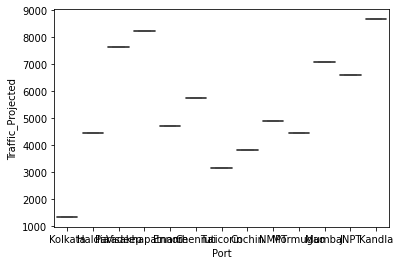

In [9]:
sns.boxplot(x='Port',y='Traffic_Projected',data=df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Port                      13 non-null     object 
 1   Traffic_Projected         13 non-null     int64  
 2   Traffic_Achieved          13 non-null     int64  
 3   Traffic_Percent%          13 non-null     float64
 4   Total_Capacity_Projected  13 non-null     int64  
 5   Total_Capacity_Achieved   13 non-null     int64  
 6   Total_Percent%            13 non-null     float64
dtypes: float64(2), int64(4), object(1)
memory usage: 856.0+ bytes


# Visualization

<AxesSubplot:xlabel='Port', ylabel='Traffic_Projected'>

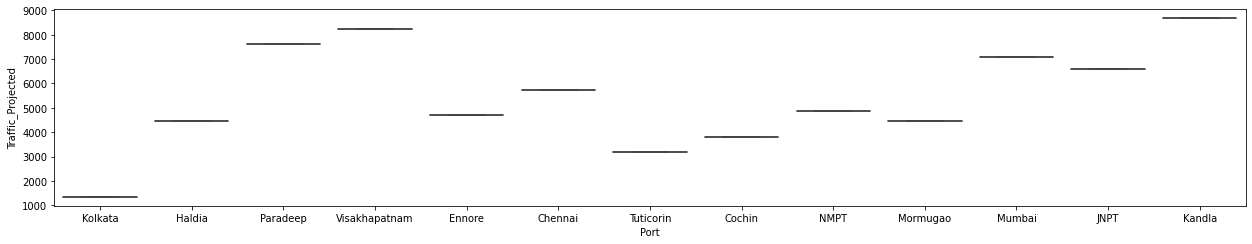

In [11]:
plt.rcParams["figure.figsize"] = [17.50,3.50]
plt.rcParams["figure.autolayout"] = True
sns.boxplot(x="Port",y = "Traffic_Projected", data = df)

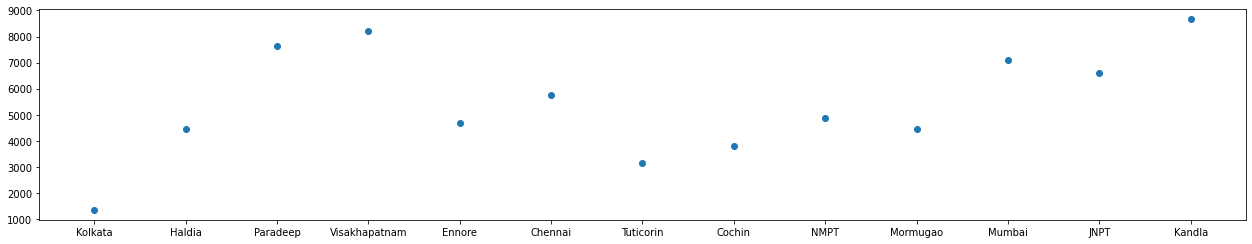

In [13]:
plt.scatter(df.Port,df.Traffic_Projected)

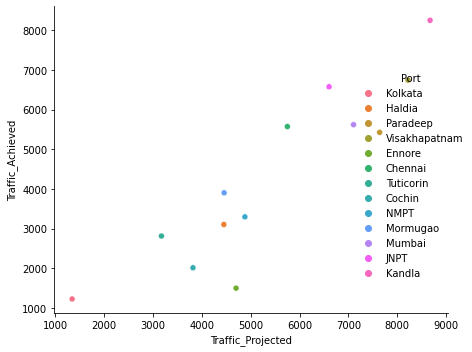

In [14]:
sns.relplot(data = df, x = "Traffic_Projected", y = "Traffic_Achieved", hue = "Port")

([<matplotlib.patches.Wedge at 0x1c967fd80a0>,
 [Text(-0.8227559810574577, 0.730118206617381, 'Kolkata'),
  Text(-0.9813250715975654, 0.49699205612769437, 'Haldia'),
  Text(-1.0974872598930092, -0.07430823892769065, 'Paradeep'),
  Text(-0.7887307236408752, -0.7667488803936667, 'Visakhapatnam'),
  Text(-0.24681684658019215, -1.0719521650914328, 'Ennore'),
  Text(0.2586200998460918, -1.0691658636318304, 'Chennai'),
  Text(0.6508775584042567, -0.8867685176897709, 'Tuticorin'),
  Text(0.8904218552781084, -0.645870667891871, 'Cochin'),
  Text(1.068042956118005, -0.2632190036580062, 'NMPT'),
  Text(1.083660055487473, 0.18889384357592884, 'Mormugao'),
  Text(0.85153993640342, 0.6963330644957625, 'Mumbai'),
  Text(0.3009306210259454, 1.058036275998578, 'JNPT'),
  Text(-0.4290148932653011, 1.0128900341876024, 'Kandla')])

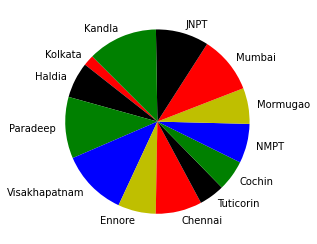

In [16]:
colors = ['r', 'k', 'g', 'b', 'y']
plt.pie(df.Traffic_Projected, labels = df.Port, colors=colors, startangle=135)

([<matplotlib.patches.Wedge at 0x1c9681b06d0>,
 [Text(-0.8292984732192152, 0.7226783809664425, 'Kolkata'),
  Text(-0.9785761523202932, 0.5023830352529937, 'Haldia'),
  Text(-1.0999917035067, -0.004272261278115301, 'Paradeep'),
  Text(-0.8509776584186843, -0.6970201036356506, 'Visakhapatnam'),
  Text(-0.4510472262335761, -1.0032728440992498, 'Ennore'),
  Text(-0.02876119418292548, -1.0996239328557615, 'Chennai'),
  Text(0.472408825560159, -0.9933931253702492, 'Tuticorin'),
  Text(0.720536507722156, -0.831160117570351, 'Cochin'),
  Text(0.932508592180857, -0.5834618458038848, 'NMPT'),
  Text(1.086706953339725, -0.1704933944852213, 'Mormugao'),
  Text(1.022266221308968, 0.406167173428238, 'Mumbai'),
  Text(0.535803745383295, 0.9606843115369551, 'JNPT'),
  Text(-0.3488393338981779, 1.0432215100952797, 'Kandla')])

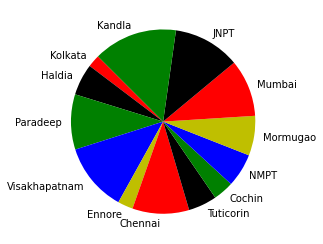

In [17]:
plt.pie(df.Traffic_Achieved, labels = df.Port, colors = colors, startangle = 135)

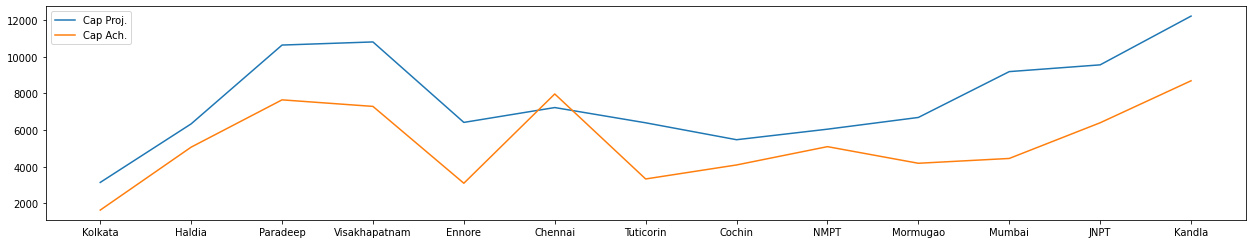

In [18]:
plt.plot(df.Port, df.Total_Capacity_Projected,label = "Cap Proj.")
plt.plot(df.Port, df.Total_Capacity_Achieved,label = "Cap Ach.")
plt.legend()

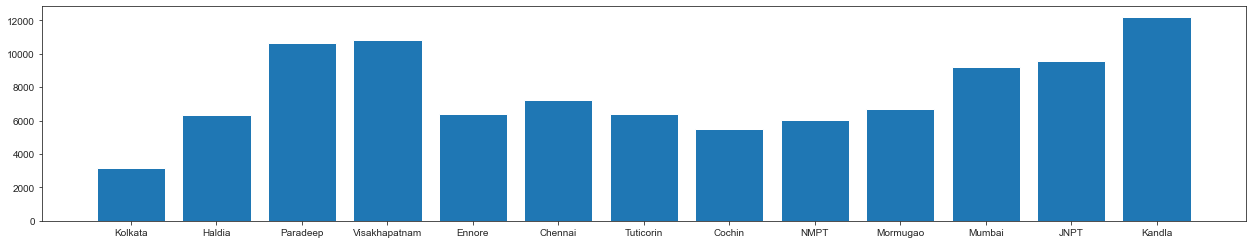

In [22]:
plt.bar(df.Port, df.Total_Capacity_Projected)
sns.set_style("ticks")

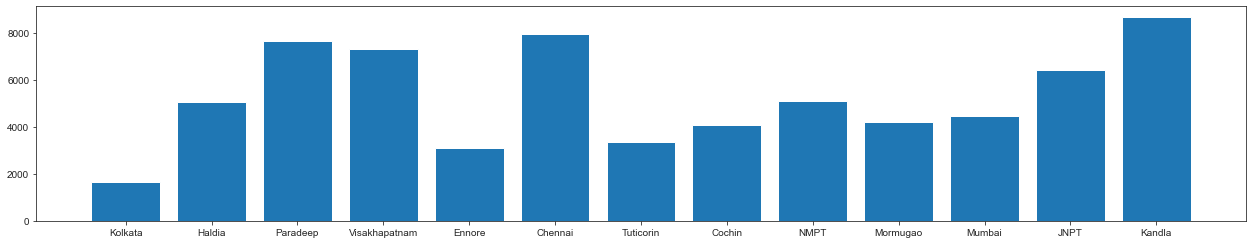

In [23]:
plt.bar(df.Port, df.Total_Capacity_Achieved)
sns.set_style('ticks')

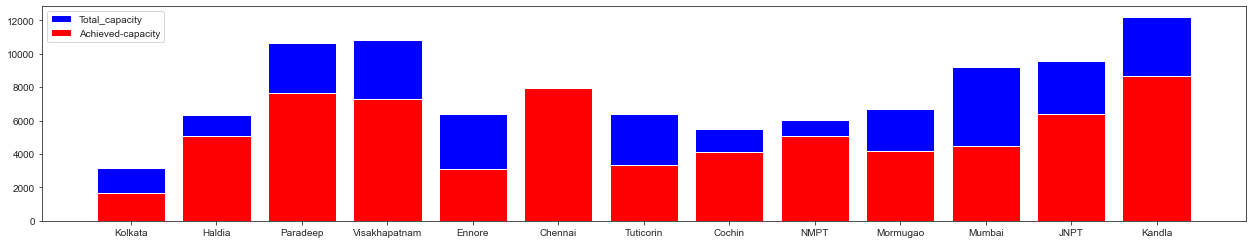

In [24]:
plt.bar(df.Port, df.Total_Capacity_Projected,label = "Total_capacity", color='b')
plt.bar(df.Port, df.Total_Capacity_Achieved,label = "Achieved-capacity", color='r')
plt.legend()